<a href="https://colab.research.google.com/github/Shikha23K/ML-Algorithm_-Continue-/blob/main/SMSspamNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import nltk 


Download nltk packages , here I m downloading 'stopwords' then quit

In [6]:
nltk.download_shell()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Load file into google drive then mount to the particular directory in google drive

In [7]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 and open with path from content to file name

In [8]:
sms=[line for line in open("/content/gdrive/My Drive/Colab Notebook/smsspamcollection/SMSSpamCollection")]


In [9]:
len(sms), type(sms)

(5574, list)

Read 2nd message into sms file

In [10]:
sms[2]


"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [11]:
import pandas as pd
df=pd.read_csv("/content/gdrive/My Drive/Colab Notebook/smsspamcollection/SMSSpamCollection",sep='\t',
               names=['target','SMS'])
df.head()



,target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   SMS     5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,target,SMS
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


Grouping ham and spam messages

In [14]:
df.groupby('target').describe()

SMS                                                               
       count unique                                                top freq
target                                                                     
ham     4827   4518                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

Feature Engineering: using domain knowledge of data to create features that make machine learning algorithm work


In [15]:
df['length']=df['SMS'].apply(len)

Adding one column named 'length'

In [16]:
df.head()

,target,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Data Visualisation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

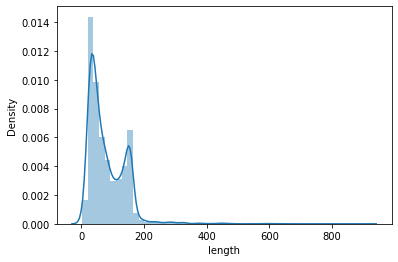

In [18]:
sns.distplot(df['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f229465cc10>,
      dtype=object)

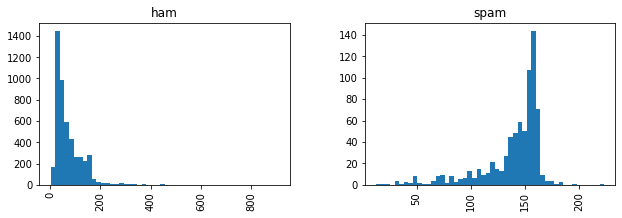

In [19]:
df.hist(column='length',by='target',figsize=(10,3),bins=50)

Text processing:Bag -of- words: conversion of text into numerical form
1: Remove punctuation from the text file
2: convert messgage into list of words
3: Remove very common words like a, the ,is etc ie; stopwords


In [20]:
import string
s= 'is this a simple message,  if yes; remove punctuation '


In [21]:
s

'is this a simple message,  if yes; remove punctuation '

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#list comprehension
nPunc=[char for char in s if char not in string.punctuation]

In [24]:
nPunc

['i',
 's',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'a',
 ' ',
 's',
 'i',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'i',
 'f',
 ' ',
 'y',
 'e',
 's',
 ' ',
 'r',
 'e',
 'm',
 'o',
 'v',
 'e',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ']

In [25]:
nPunc=''.join(nPunc)

In [26]:
nPunc

'is this a simple message  if yes remove punctuation '

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words('english')[0:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
clean_S=[word for word in nPunc.split()if word.lower() not in stopwords.words('english')]

In [30]:
clean_S

['simple', 'message', 'yes', 'remove', 'punctuation']

In [31]:
#one way of text procession function
def textPr(msz):
  for i in range(len(msz)):
    #check for Punctuation
    nPunc=[char for char in msz[i] if char not in string.punctuation]
    #join chars to form strings again
    nPunc=''.join(nPunc)
    #Remove Stopwords
    clean_S=[word for word in nPunc.split()if word.lower() not in stopwords.words('english')]
    print(clean_S)

In [32]:
textPr(df['SMS'].head(5))

['Go', 'jurong', 'point', 'crazy', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']
['Ok', 'lar', 'Joking', 'wif', 'u', 'oni']
['Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005', 'Text', 'FA', '87121', 'receive', 'entry', 'questionstd', 'txt', 'rateTCs', 'apply', '08452810075over18s']
['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say']
['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [33]:
#Second way of text processing function
def textPr(msz):
  #check for Punctuation
  nPunc=[char for char in msz if char not in string.punctuation]
  #join chars to form strings again
  nPunc=''.join(nPunc)
  #Remove Stopwords
  return [word for word in nPunc.split()if word.lower() not in stopwords.words('english')]
  

Tokenisation

In [34]:
df['SMS'].apply(textPr)#custom function applied on each row

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5569    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5570                   [ü, b, going, esplanade, fr, home]
5571                     [Pity, mood, Soany, suggestions]
5572    [guy, bitching, acted, like, id, interested, b...
5573                                   [Rofl, true, name]
Name: SMS, Length: 5574, dtype: object

Vectorisation: using scikit learn convert each message into a vector form

**Bag of Words**
1 term frequency
2 inverse document frequency
3 normalise the vector to unit length
4. it generates a sparse matrix.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_transform=CountVectorizer(analyzer=textPr).fit(df['SMS'])
#here analyzer is textPr

In [37]:
len(bow_transform.vocabulary_)#how many words in its vocabulary

11425

In [38]:
#each word of vocabulary has its own ID
bow_transform.vocabulary_.get('way')

10979

In [39]:
sms_18=df['SMS'][18]

In [40]:
bow_18=bow_transform.transform([sms_18])

bow_tranform used to transform the sms_18 into bag of words
returns each word's unique Id and count  of apperance, way is 2 times

In [41]:
print(bow_18,bow_18.shape)

  (0, 1914)	1
  (0, 3964)	1
  (0, 4880)	1
  (0, 6517)	1
  (0, 6907)	1
  (0, 10405)	1
  (0, 10698)	1
  (0, 10979)	2 (1, 11425)


In [43]:
df_bow=bow_transform.transform(df['SMS'])

transforming entire SMS into BOW

In [44]:
df_bow.shape

(5574, 11425)

shape of matrix of token counts

In [45]:
df_bow.nnz  # count of non zero nnz

50547

Compute sparsity

In [46]:
total_element=df_bow.shape[0]*df_bow.shape[1]

In [47]:
total_element

63682950

In [48]:
sparsity=(df_bow.nnz/total_element)*100

In [49]:
sparsity

0.0793728933725589

**TF-IDF**: - 
Term Frequency(TF)=>measures how frequently a term occures in a document; depends upon (t,d) t is term and d is document.
Inverse Document Frequency(IDF)=> measures the importance of the term in the corpus(group of all document)


Each word or term that occurs in the text has its respective TF and IDF score.
the higher the TF*IDF score (weight), the rarer the term is in a given document and vice versa.

scikit learn provide a tool to perform tf-idf ie; TfidfTransformer

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
tfidf_trans=TfidfTransformer()

In [52]:
tfidf_trans.fit(df_bow)

TfidfTransformer()

In [54]:
tfidf_18=tfidf_trans.transform(bow_18)

weighted value of each word in document shows relation b/w TF and IDF;

Run a TF*IDF report for your words and get their weights. The higher the numerical weight value, the rarer the term. The smaller the weight, the more common the term. Compare all the terms with high TF*IDF weights with respect to their search volumes on the web. Select those with higher search volumes and lower competition. Work smart.

In [56]:
print(tfidf_18)

  (0, 10979)	0.4614375280079636
  (0, 10698)	0.1495253599912523
  (0, 10405)	0.40717308122202533
  (0, 6907)	0.40717308122202533
  (0, 6517)	0.25779661261306913
  (0, 4880)	0.25954995512880547
  (0, 3964)	0.40717308122202533
  (0, 1914)	0.36540737207633656


In [59]:
tfidf_trans.idf_[bow_transform.vocabulary_['way']]

5.061699404860483

In [60]:
df_tfidf=tfidf_trans.transform(df_bow)

In [61]:
df_tfidf.shape

(5574, 11425)

Machine Learning: training and evaluating the model

now we hv transformed our data into vector form we can train our ML Algorithm; ie; classifiction problem to detect whether spam or ham

Naive Bayes: good choice in text retrieval community. with appropriate pre processing , Naive Bayes is competitve with more advanced method including Support Vector Machines.

In [62]:
from sklearn.naive_bayes import MultinomialNB

In [63]:
model=MultinomialNB()

In [65]:
from sklearn.model_selection import train_test_split


In [64]:
X=df_tfidf
Y=df['target']

In [66]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.33, random_state=42)

In [67]:
model.fit(XTrain,YTrain)

MultinomialNB()

In [68]:
pred=model.predict(XTest)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(YTest,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1585
        spam       1.00      0.75      0.85       255

    accuracy                           0.96      1840
   macro avg       0.98      0.87      0.92      1840
weighted avg       0.97      0.96      0.96      1840



In [71]:
print(confusion_matrix(YTest,pred))

[[1585    0]
 [  65  190]]


**Pipeline: **

pipeline for workflow
assembles several steps from preprocessing of data til the accuracy of prediction

SKlearn provides the tools

In [73]:
X=df['SMS']

In [72]:
Y=df['target']


In [93]:
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,test_size=0.33,random_state=13)

In [94]:
from sklearn.pipeline import Pipeline

below the steps included in text data vectorisation ,passed to Pipeline: 

In [95]:
ppline=Pipeline([
                 #Tokenisation using SKlearn CountVectorizer
                 ('bow',CountVectorizer(analyzer=textPr)),

                 #Computing Tf-IDF
                 ('tfIdf',TfidfTransformer()),
                 #Naive Bayes Classifier to train on TfIdf vector
                ('NB_Model',MultinomialNB())
                ])

In [96]:
XTrain.shape

(3734,)

In [97]:
YTrain.shape

(3734,)

In [98]:
ppline.fit(XTrain,YTrain)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textPr at 0x7f22944210e0>)),
                ('tfIdf', TfidfTransformer()), ('NB_Model', MultinomialNB())])

In [99]:
pred=ppline.predict(XTest)

In [101]:
print(classification_report(YTest,pred))


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.71      0.83       247

    accuracy                           0.96      1840
   macro avg       0.98      0.86      0.91      1840
weighted avg       0.96      0.96      0.96      1840



In [102]:
print(confusion_matrix(YTest,pred))

[[1593    0]
 [  71  176]]
